<a href="https://colab.research.google.com/github/KUUROO17/FUZZY/blob/main/KMEAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
df = pd.read_csv('drive/MyDrive/data.csv')
df

,nilai x,nilai y
0,3,3
1,4,4
2,5,5
3,5,1
4,1,1
5,2,2
6,1,5
7,2,4
8,3,2
9,4,2


Text(0, 0.5, 'nilai y')

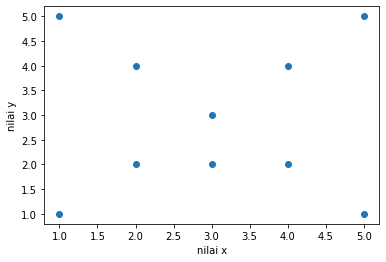

In [22]:
plt.scatter(df['nilai x'], df['nilai y'])
plt.xlabel('nilai x')
plt.ylabel('nilai y')

In [23]:
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)
df_scaled

array([[ 0.        ,  0.06917145],
       [ 0.70710678,  0.76088591],
       [ 1.41421356,  1.45260037],
       [ 1.41421356, -1.31425748],
       [-1.41421356, -1.31425748],
       [-0.70710678, -0.62254302],
       [-1.41421356,  1.45260037],
       [-0.70710678,  0.76088591],
       [ 0.        , -0.62254302],
       [ 0.70710678, -0.62254302]])

In [24]:
df_scaled = pd.DataFrame(df_scaled, columns=['nilai x','nilai y'])
df_scaled


,nilai x,nilai y
0,0.000000,0.069171
1,0.707107,0.760886
2,1.414214,1.452600
3,1.414214,-1.314257
4,-1.414214,-1.314257
5,-0.707107,-0.622543
6,-1.414214,1.452600
7,-0.707107,0.760886
8,0.000000,-0.622543
9,0.707107,-0.622543


In [25]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [26]:
y_predicted = km.fit_predict(df_scaled[['nilai x','nilai y']])
y_predicted

array([0, 2, 2, 0, 0, 0, 1, 1, 0, 0], dtype=int32)

In [27]:
df['tipePenghasilan'] = y_predicted
df

,nilai x,nilai y,tipePenghasilan
0,3,3,0
1,4,4,2
2,5,5,2
3,5,1,0
4,1,1,0
5,2,2,0
6,1,5,1
7,2,4,1
8,3,2,0
9,4,2,0


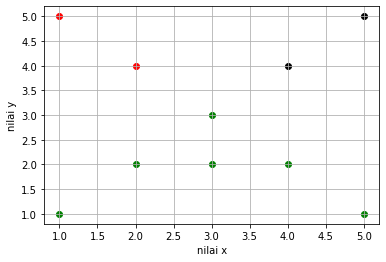

In [34]:
df1 = df[df.tipePenghasilan==0]
df2 = df[df.tipePenghasilan==1]
df3 = df[df.tipePenghasilan==2]

plt.scatter(df1['nilai x'],df1['nilai y'],color='green')
plt.scatter(df2['nilai x'],df2['nilai y'],color='red')
plt.scatter(df3['nilai x'],df3['nilai y'],color='black')

plt.xlabel('nilai x')
plt.ylabel('nilai y')
plt.grid()

In [35]:
conditions = [
    (df['tipePenghasilan']==0),
    (df['tipePenghasilan']==1),
    (df['tipePenghasilan']==2)]
choices = ['Rendah','Rata-Rata','Tinggi']
df['tipePenghasilan'] = np.select(conditions, choices)
df

,nilai x,nilai y,tipePenghasilan
0,3,3,Rendah
1,4,4,Tinggi
2,5,5,Tinggi
3,5,1,Rendah
4,1,1,Rendah
5,2,2,Rendah
6,1,5,Rata-Rata
7,2,4,Rata-Rata
8,3,2,Rendah
9,4,2,Rendah
